There are a hell of a lot of options in the `PySRRegressor` class. I think part of the reason why that is has to do with telling the underlying Julia code what to do. So, here we are going to explore and understand them.

In [7]:
_SEARCH_SPACE_BINARY_OPERATORS = [
    "+", "-", "*", "/", "^"
]

_SEARCH_SPACE_UNARY_OPERATORS = [
   "exp", "log", "sqrt", "sin", "cos", "tan"
]

_SEARCH_SPACE_MAXIUMUM_COMPLEXITY = 20

_SEARCH_SPACE_MAXIMUM_DEPTH = None

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from pysr import PySRRegressor

np.set_printoptions(precision = 3, suppress = True)

In [9]:
py_regressor_models = PySRRegressor(

    # === SEARCH SPACE ===

    # (1): Binary operators:
    binary_operators = _SEARCH_SPACE_BINARY_OPERATORS,

    # (2): Unary operators:
    unary_operators = _SEARCH_SPACE_UNARY_OPERATORS,

    # (3): Maximum complexity of chosen equation:
    maxsize = _SEARCH_SPACE_MAXIUMUM_COMPLEXITY,

    # (4): Maximum depth of a chosen equation:
    maxdepth = _SEARCH_SPACE_MAXIMUM_DEPTH,

    # === SEARCH SIZE ===

    # (1): Number of iterations for the algorithm:
    niterations = 40,

    # (2): The number of "populations" running:
    populations = 15,

    # (3): The size of each population:
    population_size = 33,

    # (4): Whatever the fuck this means:
    ncycles_per_iteration = 550,

    # === OBJECTIVE ===

    # (1): Option 1: Specify *Julia* code to compute elementwise loss:
    elementwise_loss = "loss(prediction, target) = (prediction - target)^2",

    # (2): Option 2: Code your own *Julia* loss:
    loss_function = None,

    # (3): Choose the "metric" to select the final function --- can be 'accuracy,' 'best', or 'score':
    model_selection = 'best',

    # (4): How much to penalize a given function if dim-analysis doesn't work:
    dimensional_constraint_penalty = 1000.0,

    # (5): Enable or disable a search for dimensionless constants:
    dimensionless_constants_only = False,

    # === COMPLEXITY ===

    # (1): Multiplicative factor that penalizes a complex function:
    parsimony = 0.0032,

    # (2): A complicated dictionary governing how complex a given operation can be:
    constraints = None,

    # (3): Another dictionary that enforces the number of times an operator may be nested:
    nested_constraints = None,

    # (4): Another dictionary that limits the complexity per operator:
    complexity_of_operators = None)

We will now break discussing `PyRegressor` and attempt to understand several examples.

## Section 1: Simple Search

In [83]:
x_data = 2 * np.random.randn(100, 5)
y_data = 2 * np.cos(x_data[:, 3]) + x_data[:, 0] ** 2 - 2

In [88]:
with np.printoptions(precision = 2, suppress = True):
    print(x_data)
    print(y_data)

[[ 0.38 -0.72 -3.64 -2.96 -0.74]
 [ 2.85 -2.55  0.07  1.34 -1.71]
 [-1.81 -0.43  2.52 -2.85 -2.02]
 [ 2.02 -0.27  0.34 -0.65  0.63]
 [-2.35 -1.41  1.01  0.92  3.41]
 [ 1.91  6.65  2.89  1.6  -0.67]
 [-0.08 -4.25  2.18  1.06  2.24]
 [ 2.34 -3.3  -0.25  0.42  3.11]
 [-0.94  0.57  0.76 -1.68 -2.17]
 [ 1.48 -1.9   0.85  2.75  1.73]
 [-1.03 -1.64  0.57 -2.02 -1.18]
 [ 2.48  0.82 -3.05 -2.65  0.29]
 [ 0.21  2.62  3.5   1.9   0.9 ]
 [ 1.07  1.7   1.46 -1.09  5.03]
 [-2.64  0.89  1.09  0.57  2.48]
 [-1.66 -0.   -1.05 -0.03  0.34]
 [-0.14  0.78 -2.    0.65  0.66]
 [-0.52 -1.77  2.95 -0.49 -0.97]
 [-1.37  1.73 -4.02  3.17 -2.54]
 [ 1.75 -0.08  0.42 -1.47  0.46]
 [-2.44 -0.43 -0.94  1.11  1.93]
 [ 0.   -1.11  0.96  1.27  0.01]
 [ 1.6   0.91 -0.28  1.9  -0.03]
 [ 4.27 -0.22 -1.27 -0.72  1.79]
 [-0.13 -1.   -0.16  3.42 -1.81]
 [ 0.17  0.8   1.93 -1.51  1.05]
 [ 1.37 -0.67  2.49 -0.75  0.48]
 [ 0.63 -5.73 -0.6   0.21 -0.87]
 [-2.09 -2.29 -3.44  3.74  1.9 ]
 [-0.05  4.44  3.53 -0.62 -0.39]
 [-3.14 -0

In [90]:
print(len(x_data))
print(len(y_data))

100
100


As it should be.

In [60]:
model = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model.fit(x_data, y_data)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.530e+05
Head worker occupation: 24.4%
Progress: 541 / 600 total iterations (90.167%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           3.503e+01  7.971e+00  y = exp(0.8136)
3           5.417e+00  1.867e+00  y = x₀ * x₀
5           2.147e+00  4.627e-01  y = -1.8081 + (x₀ * x₀)
7           2.024e+00  2.944e-02  y = ((x₀ * 0.94252) * x₀) + -1.5746
8           5.368e-01  1.327e+00  y = (-1.904 + (x₀ * x₀)) + cos(x₃)
9           4.072e-01  2.762e-01  y = ((x₀ * x₀) + exp(cos(x₃))) + -3.2104
10          2.037e-13  1.594e+01  y = ((x₀ * x₀) + -2) + (cos(x₃) * 2)
11          1.541e-13  2.792e-01  y = ((cos(x₃) + (x₀ * x₀)) + -2) + cos(x₃)
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.


PySRRegressor.equations_ = [
	   pick      score                                    equation          loss  \
	0         0.000000                              exp(0.8135951)  3.503214e+01   
	1         1.866770                                     x0 * x0  5.416752e+00   
	2         0.462698                      -1.8081068 + (x0 * x0)  2.147060e+00   
	3         0.029438          ((x0 * 0.9425216) * x0) + -1.57463  2.024301e+00   
	4         1.327419          (-1.9040427 + (x0 * x0)) + cos(x3)  5.367650e-01   
	5         0.276160     ((x0 * x0) + exp(cos(x3))) + -3.2104292  4.072389e-01   
	6  >>>>  28.323769  ((x0 * x0) + -2.0) + (cos(x3) * 1.9999999)  2.037007e-13   
	7         0.279243    ((cos(x3) + (x0 * x0)) + -2.0) + cos(x3)  1.540703e-13   
	
	   complexity  
	0           2  
	1           3  
	2           5  
	3           7  
	4           8  
	5           9  
	6          10  
	7          11  
]

In [61]:
model.sympy()

x0*x0 + cos(x3)*1.9999999 - 2.0

I don't get what this means at all. Are there multiple variables here? Let's do a really simple example so we know what is happening.

First of all, what does `np.random.randn(100, 3)` actually do? I read the documentation, but that didn't make much sense. So, let's do an experiment.

In [18]:
np.random.randn(1, 1)

array([[1.41038637]])

In [24]:
np.random.randn(1, 1)[0]

array([-0.63141306])

In [19]:
np.random.randn(2, 1)

array([[-1.44760807],
       [-0.16927308]])

In [20]:
np.random.randn(2, 2)

array([[-1.43964384, -0.73685203],
       [-1.83013796, -0.34083321]])

Now, I think I get what it is doing a little bit more. Now, let's try to understand the strange slicing we saw in the baby example above.

In [28]:
test_array_1 = np.random.randn(2, 2)
test_array_1

array([[-0.68071916,  0.76464593],
       [-1.12128328, -0.25811203]])

In [32]:
test_array_1[:, 1]

array([ 0.76464593, -0.25811203])

My conclusion is that the example wants to demonstrate symbolic regression on a multivariable function, and that is why the slicing is performed. I don't understand for the life of me why five columns are added when only the first and fourth are used.

Anyway, if this conclusion is correct, then we should be able to fit a bunch of easy, one-dimensional functions.

## Section 1.2: Simple Function 1

Let's make a simple function and see if PySR can get it. We will try a line:

$$y = 3.8 x - 5.2$$

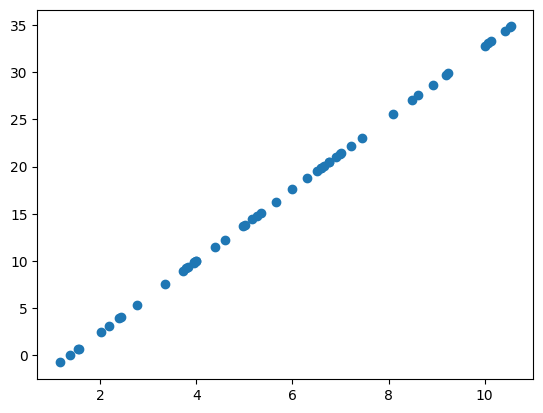

In [91]:
x_data_section_1_2 = np.array([10 * np.random.random() + 1 for i in range(0, 50)])
y_data_section_1_2 = 3.8 * x_data_section_1_2 - 5.2
plt.scatter(x_data_section_1_2, y_data_section_1_2)

In [95]:
print(len(x_data_section_1_2))
print(len(y_data_section_1_2))

50
50


In [97]:
with np.printoptions(precision = 2, suppress = True):
    print(x_data_section_1_2)
    print(y_data_section_1_2)

[ 1.53  6.59  4.59  2.18  6.75 10.54  6.76  3.98  5.65 10.42 10.07  4.96
  8.92  6.9   9.19  6.6   4.38 10.53  2.77  7.02 10.14  7.21  3.79  6.52
  8.49  3.95  8.62  2.01  5.01  8.1   5.26  6.   10.    3.83  9.23  1.55
  6.66  2.43  6.99  1.37  3.34  7.44  3.95  1.16  2.4   3.99  3.73  6.3
  5.16  5.35]
[ 0.62 19.85 12.26  3.09 20.46 34.87 20.47  9.94 16.28 34.41 33.07 13.66
 28.7  21.02 29.72 19.86 11.44 34.83  5.31 21.46 33.32 22.21  9.19 19.57
 27.08  9.83 27.55  2.45 13.84 25.56 14.81 17.58 32.8   9.36 29.88  0.69
 20.1   4.05 21.37  0.01  7.5  23.08  9.8  -0.79  3.91  9.97  8.96 18.75
 14.42 15.12]


In [99]:
with np.printoptions(precision = 2, suppress = True):
    print(x_data_section_1_2.reshape(-1, 1))

[[ 1.53]
 [ 6.59]
 [ 4.59]
 [ 2.18]
 [ 6.75]
 [10.54]
 [ 6.76]
 [ 3.98]
 [ 5.65]
 [10.42]
 [10.07]
 [ 4.96]
 [ 8.92]
 [ 6.9 ]
 [ 9.19]
 [ 6.6 ]
 [ 4.38]
 [10.53]
 [ 2.77]
 [ 7.02]
 [10.14]
 [ 7.21]
 [ 3.79]
 [ 6.52]
 [ 8.49]
 [ 3.95]
 [ 8.62]
 [ 2.01]
 [ 5.01]
 [ 8.1 ]
 [ 5.26]
 [ 6.  ]
 [10.  ]
 [ 3.83]
 [ 9.23]
 [ 1.55]
 [ 6.66]
 [ 2.43]
 [ 6.99]
 [ 1.37]
 [ 3.34]
 [ 7.44]
 [ 3.95]
 [ 1.16]
 [ 2.4 ]
 [ 3.99]
 [ 3.73]
 [ 6.3 ]
 [ 5.16]
 [ 5.35]]


We will now define the PySR Regressor.

In [101]:
model_section_1_2 = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_2.fit(x_data_section_1_2, y_data_section_1_2)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 1.532  6.592  4.594  2.181  6.752 10.545  6.756  3.983  5.653 10.424
 10.07   4.963  8.921  6.899  9.19   6.595  4.38  10.535  2.766  7.015
 10.136  7.213  3.788  6.519  8.494  3.954  8.619  2.012  5.011  8.095
  5.265  5.996 10.001  3.832  9.233  1.55   6.657  2.434  6.992  1.37
  3.341  7.443  3.948  1.161  2.398  3.992  3.725  6.303  5.164  5.347].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

What kind of bogus error is this?

In [79]:
x_data_section_1_2.reshape(-1, 1)

array([[ 3.46095205],
       [ 2.13242583],
       [ 6.41171205],
       [ 1.18023359],
       [ 7.87137325],
       [ 4.82459535],
       [ 6.11661374],
       [ 8.76663656],
       [ 1.19188128],
       [ 2.22852854],
       [ 1.40251565],
       [ 8.55841326],
       [10.49142932],
       [ 3.70253993],
       [ 4.54712582],
       [ 4.57719901],
       [ 9.44280249],
       [ 9.74974733],
       [ 8.89912557],
       [ 2.04144733],
       [10.2419527 ],
       [ 7.58524366],
       [ 4.86505635],
       [ 4.5208437 ],
       [ 8.62140053],
       [ 8.89725351],
       [ 5.87125414],
       [10.71354389],
       [ 6.95035841],
       [ 2.53027457],
       [ 8.16206548],
       [10.45841378],
       [ 9.63113096],
       [ 2.7664995 ],
       [ 6.72001323],
       [ 4.10110807],
       [ 2.51583191],
       [ 3.36375971],
       [ 4.02473433],
       [ 7.0354871 ],
       [ 3.5934644 ],
       [ 8.89124564],
       [ 6.53691755],
       [ 6.3788177 ],
       [ 9.60126896],
       [ 1

So, it just likes it to be fed in in a certain way. Alright.

In [102]:
model_section_1_2 = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_2.fit(x_data_section_1_2.reshape(-1, 1), y_data_section_1_2)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick      score                      equation          loss  complexity
	0         0.000000                exp(3.0628917)  1.250864e+02           2
	1         3.264015                3.0628917 * x0  4.782624e+00           3
	2  >>>>  14.622353  -5.200001 + (3.8000002 * x0)  9.524704e-13           5
]

In [103]:
model_section_1_2.sympy()

3.8000002*x0 - 5.200001

It got it pretty accurately!

Now, we also want to be able to plot the prediction and so on.

In [114]:
model_section_1_2.predict(x_data_section_1_2.reshape(-1, 1))

array([ 0.623, 19.851, 12.259,  3.09 , 20.458, 34.871, 20.473,  9.937,
       16.282, 34.41 , 33.067, 13.66 , 28.699, 21.017, 29.723, 19.862,
       11.444, 34.833,  5.312, 21.458, 33.318, 22.208,  9.195, 19.571,
       27.078,  9.826, 27.551,  2.445, 13.842, 25.562, 14.807, 17.585,
       32.805,  9.36 , 29.884,  0.688, 20.096,  4.049, 21.37 ,  0.006,
        7.496, 23.084,  9.803, -0.789,  3.913,  9.971,  8.955, 18.751,
       14.422, 15.118])

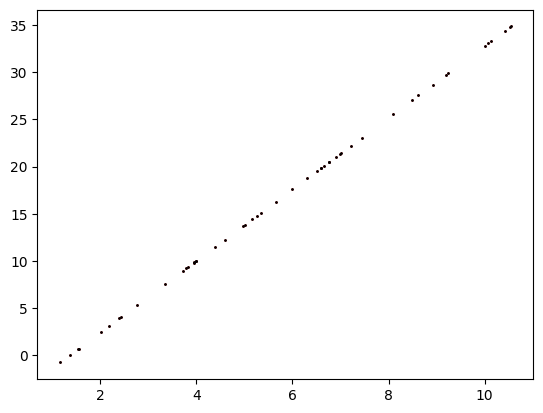

In [119]:
plt.scatter(
    x_data_section_1_2.reshape(-1, 1),
    model_section_1_2.predict(x_data_section_1_2.reshape(-1, 1)),
    color = 'red',
    s = 0.5)

plt.scatter(
    x_data_section_1_2.reshape(-1, 1),
    y_data_section_1_2,
    color = 'black',
    s = 1)

## Section 1.3: A Quadratic Function

This function closely resembles *one part* of the one we want to figure out eventually. It looks like this:

$$(a x^{2} + b x) + f.$$

For the following section, we will use these parameters:

$a = -4.41$, $b = 1.68$, $f = -1.37$.

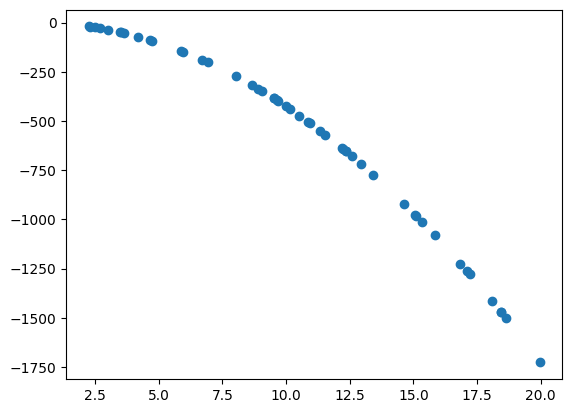

In [126]:
x_data_section_1_3 = np.array([20 * np.random.random() + 1 for i in range(0, 50)])
y_data_section_1_3 = (-4.41 * x_data_section_1_3**2 + 1.68 * x_data_section_1_3) - 1.37
plt.scatter(x_data_section_1_3, y_data_section_1_3)

In [134]:
model_section_1_3 = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*", "-", "/"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_3.fit(x_data_section_1_3.reshape(-1, 1), y_data_section_1_3)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                                 x0   
	1        0.031961                                     sin(-1.632799)   
	2        2.444262                                  x0 / -0.018658916   
	3        0.124727                               x0 / cos(-1.5884246)   
	4        7.748945                               x0 / (-0.23217 / x0)   
	5        2.388587             x0 / (-0.22719249 / (x0 - 0.32679278))   
	6        7.947124  -1.3704375 - (4.410004 * ((x0 - 0.38097346) * ...   
	7  >>>>  0.378309  ((x0 * 1.6800117) - (4.4100003 * (x0 * x0))) -...   
	8        0.059535  ((((((x0 * -1.2049999) + 0.3399988) - x0) * (x...   
	
	           loss  complexity  
	0  5.648402e+05           1  
	1  5.470728e+05           2  
	2  4.748055e+04           3  
	3  4.191289e+04           4  
	4  1.807272e+01           5  
	5  1.521681e-01           7  
	6  1.903442e-08           9  
	7  4.191315e-09          13  
	8  3.303139e-09          17  
]

In [135]:
model_section_1_3.sympy()

-4.4100003*x0*x0 + x0*1.6800117 - 0.3814533*3.5916748

## Section 1.4: The Other Part

This function closely resembles the *other part* of the one we want to figure out eventually. It looks like this:

$$e^{c x^{2} + d x^{2} + e} + f.$$

For the following section, we will use these parameters:

$c = -9.14$, $d = -3.57$, $e = 1.54$, $f = -1.37$.

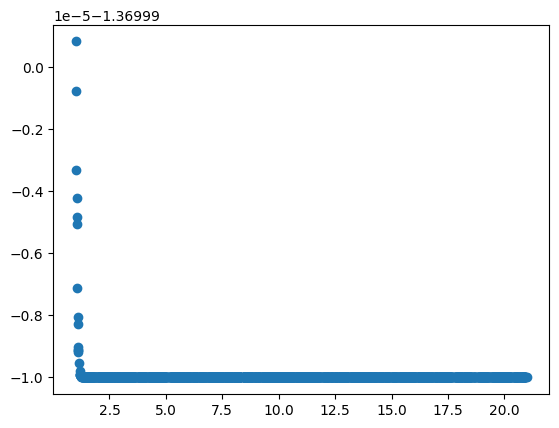

In [150]:
x_data_section_1_4 = np.array([20 * np.random.random() + 1 for i in range(0, 2000)])
y_data_section_1_4 = np.exp(-9.14 * x_data_section_1_4**2 - 3.57 * x_data_section_1_4 + 1.54) - 1.37
plt.scatter(x_data_section_1_4, y_data_section_1_4)

In [151]:
model_section_1_4 = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*", "-", "/"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_4.fit(x_data_section_1_4.reshape(-1, 1), y_data_section_1_4)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 7.910e+04
Head worker occupation: 12.6%
Progress: 173 / 600 total iterations (28.833%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.986e-01  1.594e+01  y = -0.82352
2           1.399e-01  7.582e-01  y = sin(-1.6609)
3           1.764e-13  1.594e+01  y = 0.017712 + -1.3877
5           1.571e-13  5.806e-02  y = (9.6317e-07 / x₀) - 1.37
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 9.670e+04
Head worker occupation: 15.7%
Progress: 427 / 600 total iterations (71.167%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.986e-01  1.594e+01  y = -0.82352
2           1.370e-01  7.79

PySRRegressor.equations_ = [
	   pick      score                        equation          loss  complexity
	0         0.000000                     -0.82352185  2.986385e-01           1
	1         0.779389                 sin(-1.5559669)  1.369814e-01           2
	2  >>>>  27.377995         0.01771216 + -1.3877121  1.764207e-13           3
	3         0.058059  (9.631746e-7 / x0) - 1.3700001  1.570797e-13           5
]

In [152]:
model_section_1_4.sympy()

-1.3877121 + 0.01771216

In [155]:
# First pass:
-1.3543898-0.015610022

-1.369999822

In [154]:
# Second pass:
-1.3877121+0.01771216

-1.3699999399999998

That's about the same value as $f$ above. So, that checks out.

## Section 1.5: A Multivariate Function

This function closely resembles the *other part* of the one we want to figure out eventually. It looks like this:

$$f(x, y) = (a x^{2} + b x) e^{c y^{2} + d y^{2} + e} + f.$$

For the following section, we will use these parameters:

$a = -4.41$, $b = 1.68$, $c = -9.14$, $d = -3.57$, $e = 1.54$, $f = -1.37$.

Text(0.5, 0, 'Z Label')

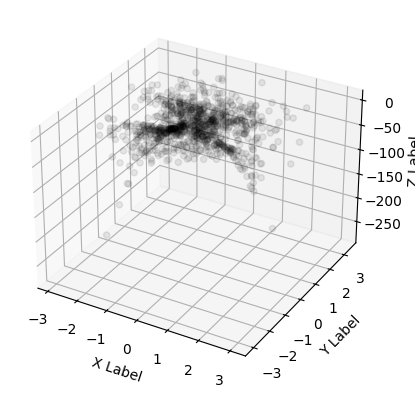

In [163]:
x_data_section_1_5 = np.random.randn(1000, 2)
z_data_section_1_5 = (-4.41 * x_data_section_1_5[:, 0]**2 + 1.68 * x_data_section_1_5[:, 0]) * np.exp(-9.14 * x_data_section_1_5[:, 1]**2 - 3.57 * x_data_section_1_5[:, 1] + 1.54) - 1.37


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_data_section_1_5[:, 0], x_data_section_1_5[:, 1], z_data_section_1_5, color = 'black', alpha = 0.08)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [166]:
model_section_1_5 = PySRRegressor(
    niterations = 100,
    binary_operators = ["+", "*", "-", "/"],
    unary_operators = [
        "exp",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_5.fit(x_data_section_1_5, z_data_section_1_5)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 9.800e+04
Head worker occupation: 22.5%
Progress: 199 / 1500 total iterations (13.267%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           5.072e+02  7.971e+00  y = exp(-12.456)
3           4.280e+02  1.700e-01  y = x₀ - 8.6568
4           3.585e+02  1.772e-01  y = -5.0825 / exp(x₀)
6           3.358e+02  3.260e-02  y = -1.7345 - exp(-1.7345 * x₀)
7           3.220e+02  4.206e-02  y = -3.8488 - exp(exp(x₀ * -0.58456))
8           3.219e+02  1.779e-04  y = (-8.5329 * (x₀ * x₀)) + exp(x₀)
9           3.007e+02  6.817e-02  y = ((x₀ / exp(x₀)) - exp(x₀)) * 2.8415
11          2.988e+02  3.227e-03  y = (((x₀ / exp(x₀)) - exp(x₀)) * 2.8415) + x₁
13          2.744e+02  4.254e-02  y = (((x₁ * x₁) - 2.1801) * exp(exp(-0.54328 * x₀))) - 0.97001
14          2.580e+02  6.156e-02  y = (((x₁ * x₁) - 2.1801) * exp(exp(-0.54328 * x₀))) - exp(x₀)
16     

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          -8.643733   
	1         0.005316                                     -8.659507 + x0   
	2         0.177193                               -5.0824666 / exp(x0)   
	3         0.076711                              -8.642709 * (x0 * x0)   
	4         0.010985                  -2.7790632 - exp(-1.8137707 * x0)   
	5         0.057622                       (-8.642709 + x0) * (x0 * x0)   
	6         0.235439                    -9.871497 / exp((x1 * x1) + x0)   
	7         0.106000    -13.941312 / exp(((x1 / 0.23433937) * x1) + x0)   
	8         0.000734  -13.941312 / exp(((x1 / exp(-1.4257797)) * x1)...   
	9         0.333890  -12.69023 / exp(((x1 + 0.3690661) * (x1 / 0.14...   
	10        0.027904  (-12.69023 / exp(((x1 + 0.3690661) * (x1 / 0.1...   
	11  >>>>  0.115563  (-12.69023 / exp(((x1 + 0.3690661) * (x1 / 0.1...   
	12        0.053714  (-12.69023 / exp(((x1 + 0.3690661) * (x1 / 0.1...   
	13        0.047543  ((-12.69023 - exp(x0 / 0.444316)) / exp(((0.36...   
	14        0.099745  ((-12.69023 - exp(x0 / 0.444316)) / exp(((0.36...   
	
	         loss  complexity  
	0   432.53387           1  
	1   427.95917           3  
	2   358.46628           4  
	3   331.99622           5  
	4   328.36935           6  
	5   309.98288           7  
	6   244.95586           8  
	7   198.16074          10  
	8   198.01526          11  
	9   141.80522          12  
	10  134.10811          14  
	11  119.47214          15  
	12  107.30291          17  
	13   97.57001          19  
	14   88.30752          20  
]

In [167]:
model_section_1_5.sympy()

-exp(x0) - 12.69023*exp(-x0 - x1*(x1 + 0.3690661)/0.1472638)

## Section 8: Complex Numbers

Supposedly, PySR can get complex-valued functions too. Let's try this out. 

In [104]:
x_data = np.random.randn(100, 1) + 1j * np.random.randn(100, 1)
y_data = (1 + 2j) * np.cos(x_data[:, 0] * (0.5 - 0.2j))

model = PySRRegressor(
    binary_operators=["+", "-", "*"], unary_operators=["cos"], niterations=100,
    )

model.fit(x_data, y_data)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.770e+05
Head worker occupation: 24.5%
Progress: 377 / 1500 total iterations (25.133%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.956e+00  1.594e+01  y = 0.2011187f0 + 0.22265242f0im
2           9.795e-01  1.621e+00  y = cos(1.1808321f0 - 1.548395f0im)
4           8.148e-01  9.206e-02  y = cos(x₀) + (0.04249615f0 + 1.9707092f0im)
6           6.918e-09  7.937e+00  y = (1.0000228f0 + 2.0000572f0im) * cos((-0.49998015f0 + 0.199...
                                  99269f0im) * x₀)
8           2.403e-09  5.288e-01  y = cos(x₀ * ((-0.49477905f0 + 0.27785128f0im) * (0.9408245f0 ...
                                  + 0.124127656f0im))) * (1.0000185f0 + 2.0000312f0im)
14          1.148e-09  1.230e-01  y = cos(((((-0.21815549f0 + 0.23892754f0im) * cos(0.8813797f0 ...
                                  - 0.3695445f0im)) + cos(0.7802497

PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                        0.4722739e0 + 0.48936626e0j   
	1         1.332738                     cos(1.1808321e0 - 1.548395e0j)   
	2         0.092058           cos(x0) + (0.042493384e0 + 1.9707121e0j)   
	3        10.018470  cos((0.49999484e0 - 0.1999933e0j) * x0) * (1.0...   
	4         0.106656  ((1.0000125e0 + 2.0000005e0j) * cos((0.4999948...   
	5  >>>>   0.123130  cos((0.9656515e0 - 0.15518089e0j) * ((cos(cos(...   
	
	           loss  complexity  
	0  3.713841e+00           1  
	1  9.795411e-01           2  
	2  8.148213e-01           4  
	3  1.618563e-09           6  
	4  1.056449e-09          10  
	5  7.301706e-10          13  
]

In [105]:
model.sympy()

(0.9999926 + 2.0000186*I)*cos(x0*(0.8600596 - 0.24357042*I)*(0.9656515 - 0.15518089*I)*cos(cos(cos(1.117639 - 0.1111241*I))))